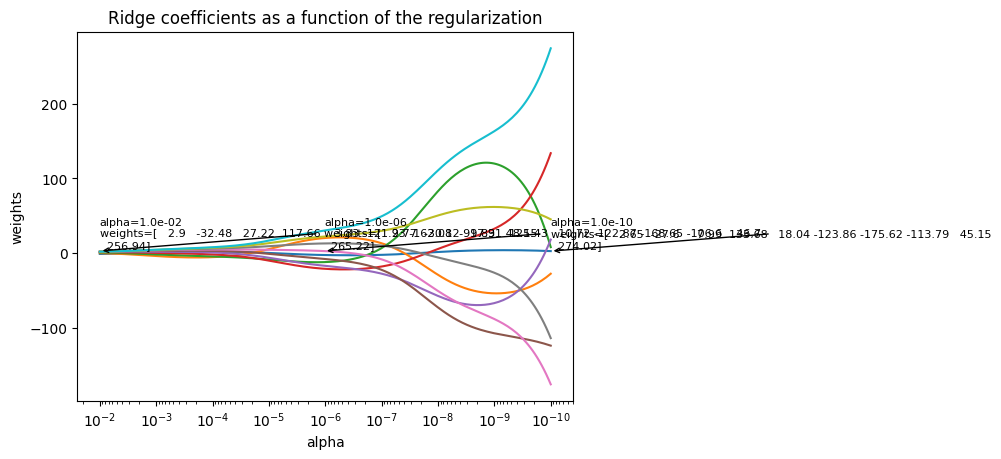

Coefficients for alpha=1.0e-10: [   2.65  -27.6     7.99  133.68   18.04 -123.86 -175.62 -113.79   45.15
  274.02]
Coefficients for alpha=1.0e-06: [ -2.59  20.12 -12.09 -20.96 -16.95  -7.8    2.71  12.92  22.16  30.22]
Coefficients for alpha=1.0e-02: [-1.15 -0.06  0.82  1.33  1.62  1.78  1.86  1.89  1.89  1.88]
Execution finished. Check above for any potential issues.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

try:
    # Generate the 10x10 Hilbert matrix and target vector
    X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
    y = np.ones(10)

    # Validate the generated matrix and target vector
    if X.shape != (10, 10) or y.shape != (10,):
        raise ValueError("Unexpected shape for Hilbert matrix or target vector")

    # Compute Ridge coefficients paths for different alphas
    n_alphas = 200
    alphas = np.logspace(-10, -2, n_alphas)
    if len(alphas) == 0:
        raise ValueError("Alpha range is empty. Check the parameters for np.logspace")

    coefs = []
    for a in alphas:
        ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)

    # Plot Ridge coefficients as a function of regularization
    fig, ax = plt.subplots()
    ax.plot(alphas, coefs)
    ax.set_xscale("log")
    ax.set_xlim(ax.get_xlim()[::-1])  # Reverse the x-axis to show decreasing alphas
    plt.xlabel("alpha")
    plt.ylabel("weights")
    plt.title("Ridge coefficients as a function of the regularization")
    plt.axis("tight")

    # Highlight points and provide interpretation
    for idx, alpha_value in enumerate([alphas[0], alphas[len(alphas)//2], alphas[-1]]):
        coefs_at_alpha = coefs[idx]
        label_text = f"alpha={alpha_value:.1e}\nweights={np.round(coefs_at_alpha, 2)}"
        ax.annotate(label_text, xy=(alpha_value, coefs_at_alpha[0]), xytext=(alpha_value, coefs_at_alpha[0] + 1),
                    arrowprops=dict(facecolor='black', arrowstyle="->"),
                    fontsize=8, verticalalignment="bottom")

    plt.show()

    # Print specific numerical observations for extreme and median alpha values
    print(f"Coefficients for alpha={alphas[0]:.1e}: {np.round(coefs[0], 2)}")
    print(f"Coefficients for alpha={alphas[len(alphas)//2]:.1e}: {np.round(coefs[len(alphas)//2], 2)}")
    print(f"Coefficients for alpha={alphas[-1]:.1e}: {np.round(coefs[-1], 2)}")

except ValueError as ve:
    print(f"ValueError occurred: {ve}")
except IndexError as ie:
    print(f"IndexError occurred: {ie}")
except ImportError as imp_err:
    print(f"ImportError occurred: {imp_err}")
except Exception as e:
    # Catch-all for any other unexpected errors
    print(f"An unexpected error occurred: {e}")
finally:
    print("Execution finished. Check above for any potential issues.")
